# Sentiment analysis:
## Reviews & Ratings of Cards, Loans, Insurance and Investment Options.
### 1. On Sample basis taking only two pages.
### 2. Total 40 Reviews are there in two pages.



- Website : Bankbazar.com

In [1]:
import pandas as pd

### The glob module finds all the pathnames matching a specified pattern

In [2]:
import glob

In [3]:
html_files = glob.glob(r"*.html")

### Two HTML files found in specified path

In [4]:
html_files

['Review1.html', 'Review2.html']

In [5]:
import codecs

In [6]:
s = " "
html_array = []
for file in html_files:
    f = codecs.open(file,"r")
    html_array.append(f.read())


In [7]:
html = s.join(html_array)

In [8]:
# print all source code of html file
# print(html)

### Class : "text_here review-desc-more"  for saving reviews
- 40 Reviews found

In [9]:
html.count("text_here review-desc-more")

40

### Beautiful Soup is a Python package for parsing HTML and XML documents

In [10]:
from bs4 import BeautifulSoup

In [11]:
parsed_html = BeautifulSoup(html,"html.parser")

In [12]:
Reviews = parsed_html.find_all('div',{'class':"text_here review-desc-more"})

In [13]:
# Out of 40 only 5 Reviews printing
print(Reviews[0:5])

[<div class="text_here review-desc-more" itemprop="description">
                                Its because of the good offers i have chosen the credit card from Indusind bank. Its a life time free credit card. I had applied the card with the card to card process hence they have given me a existing credit limit which I'm satisfied with. Purchased the credit card 1 month before. I got the credit card on time and the same has been delivered to residential address.</div>, <div class="text_here review-desc-more" itemprop="description">
                                I have taken personal loan directly through Capital First.This loan is still active ,The rate of interest and the processing fee was nominal it was 18%.The loan amount got on time and paying the premium on EMI basis.I am satisfied with the  overall service so far .</div>, <div class="text_here review-desc-more" itemprop="description">
                                I have Ratnakar Bank credit card which was taken through Ban

In [14]:
len(Reviews)

40

### RegEx library for dealing with patterns in string

In [15]:
import re

In [16]:
def clean_html(raw_html):
    clean = re.compile('<>*.?')
    cleaned_text = re.sub(clean,'',raw_html)
    return cleaned_text

In [17]:
revws = []

for i in range(0,len(Reviews)):
    revws.append(clean_html(Reviews[i].text))

In [18]:
# print(revws)

In [24]:
# Dispay full stuff of rows:

pd.set_option('display.max_colwidth',1)

In [25]:
Reviews = pd.DataFrame({'Reviews':revws})

In [26]:
Reviews.head()

,Reviews
0,\n Its because of the good offers i have chosen the credit card from Indusind bank. Its a life time free credit card. I had applied the card with the card to card process hence they have given me a existing credit limit which I'm satisfied with. Purchased the credit card 1 month before. I got the credit card on time and the same has been delivered to residential address.
1,"\n I have taken personal loan directly through Capital First.This loan is still active ,The rate of interest and the processing fee was nominal it was 18%.The loan amount got on time and paying the premium on EMI basis.I am satisfied with the overall service so far ."
2,\n I have Ratnakar Bank credit card which was taken through Bank directly.This card is good to use and there are good reward points as well as cash back offers .There are buy one get one movie ticket offers .I have uploaded documents through online only.I am comfortable with the service so far .
3,"\n I have a problem with the call centre people because when i contact Indusind, they are not picking up the call within few minutes. Bank has given me a limit of Rs. 50000 which is higher for me. While I'm applying the card, they have given me a good services. There is no yearly charges for this card. I have received my first month statement and its clear to understand."
4,"\n I have been using the paytm services for past 2 years. Most of the times, i do the UPI payment and money transfer. There is a additional charges for fund transfer anyway its nominal. I have installed the app in my phone. Rarely i used to receive the cashback offers. Sometimes i use this app for bus ticket booking and movie ticket booking."


### Drop Duplicates if any

In [27]:
Reviews.drop_duplicates(inplace=True)

In [28]:
Reviews.head()

,Reviews
0,\n Its because of the good offers i have chosen the credit card from Indusind bank. Its a life time free credit card. I had applied the card with the card to card process hence they have given me a existing credit limit which I'm satisfied with. Purchased the credit card 1 month before. I got the credit card on time and the same has been delivered to residential address.
1,"\n I have taken personal loan directly through Capital First.This loan is still active ,The rate of interest and the processing fee was nominal it was 18%.The loan amount got on time and paying the premium on EMI basis.I am satisfied with the overall service so far ."
2,\n I have Ratnakar Bank credit card which was taken through Bank directly.This card is good to use and there are good reward points as well as cash back offers .There are buy one get one movie ticket offers .I have uploaded documents through online only.I am comfortable with the service so far .
3,"\n I have a problem with the call centre people because when i contact Indusind, they are not picking up the call within few minutes. Bank has given me a limit of Rs. 50000 which is higher for me. While I'm applying the card, they have given me a good services. There is no yearly charges for this card. I have received my first month statement and its clear to understand."
4,"\n I have been using the paytm services for past 2 years. Most of the times, i do the UPI payment and money transfer. There is a additional charges for fund transfer anyway its nominal. I have installed the app in my phone. Rarely i used to receive the cashback offers. Sometimes i use this app for bus ticket booking and movie ticket booking."


In [29]:
Reviews.dtypes

Reviews    object
dtype: object

In [30]:
type(Reviews)

pandas.core.frame.DataFrame

In [31]:
# Saving file in excel format

# Reviews.to_excel('abc.xlsx')

# =======================================================

# TextBlob is a Python library for processing textual data

In [33]:
from textblob import TextBlob

In [34]:
text = Reviews['Reviews']

In [35]:
type(text[0])

str

### importing Stopwords list form nltk libarary

In [37]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))

### Printing only 10 stopwords to avoid more scrolling

In [39]:
stopwords_list = list(stopwords_list)
stopwords_list[:10]

['whom',
 'himself',
 'there',
 'further',
 'hasn',
 'each',
 'our',
 "you'd",
 'having',
 'herself']

In [40]:
from nltk.tokenize import word_tokenize

In [45]:
# After removing stopwords from reviews storing back as string format

In [46]:
my_string = " "

for words in text:
    for word in (word_tokenize(words)):
        if word not in stopwords_list:
            my_string += (word+" ")
            
    my_string += " *** "
            

In [47]:
# my_string

In [48]:
my_string = my_string.split("***")

### Out of 40 only 5 reviews (Stopwords removed) printing to avoid more scrolling

In [50]:
my_string[0:5]

[" Its good offers chosen credit card Indusind bank . Its life time free credit card . I applied card card card process hence given existing credit limit I 'm satisfied . Purchased credit card 1 month . I got credit card time delivered residential address .  ",
 ' I taken personal loan directly Capital First.This loan still active , The rate interest processing fee nominal 18 % .The loan amount got time paying premium EMI basis.I satisfied overall service far .  ',
 ' I Ratnakar Bank credit card taken Bank directly.This card good use good reward points well cash back offers .There buy one get one movie ticket offers .I uploaded documents online only.I comfortable service far .  ',
 " I problem call centre people contact Indusind , picking call within minutes . Bank given limit Rs . 50000 higher . While I 'm applying card , given good services . There yearly charges card . I received first month statement clear understand .  ",
 ' I using paytm services past 2 years . Most times , UPI p

In [51]:
from textblob import TextBlob

In [52]:
blob = TextBlob(my_string[0])

# Calculating sentiment polarity of reviews

In [53]:
for i in range(0,len(my_string)):
    print(f"\n {my_string[i]}\n sentiment Polarity {(TextBlob(my_string[i]).polarity)} \n ")
    print(f"="*120)
    


  Its good offers chosen credit card Indusind bank . Its life time free credit card . I applied card card card process hence given existing credit limit I 'm satisfied . Purchased credit card 1 month . I got credit card time delivered residential address .  
 sentiment Polarity 0.425 
 

  I taken personal loan directly Capital First.This loan still active , The rate interest processing fee nominal 18 % .The loan amount got time paying premium EMI basis.I satisfied overall service far .  
 sentiment Polarity 0.09444444444444444 
 

  I Ratnakar Bank credit card taken Bank directly.This card good use good reward points well cash back offers .There buy one get one movie ticket offers .I uploaded documents online only.I comfortable service far .  
 sentiment Polarity 0.3 
 

  I problem call centre people contact Indusind , picking call within minutes . Bank given limit Rs . 50000 higher . While I 'm applying card , given good services . There yearly charges card . I received first month

In [55]:
# Reviews

In [57]:
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization

In [63]:
!pip install wordcloud

In [64]:
from wordcloud import WordCloud

In [76]:
Review_string = str(Reviews)

In [77]:
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(Review_string) 

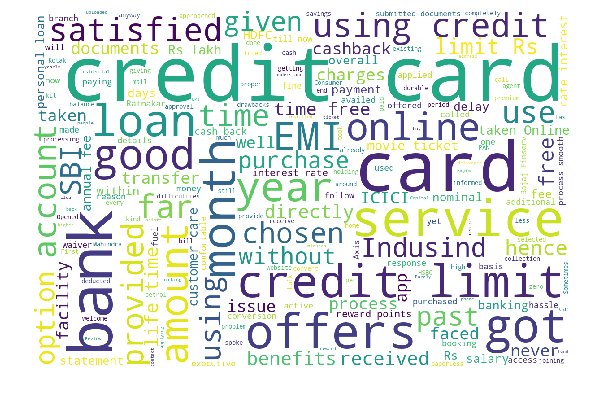

In [78]:
plt.figure(figsize = (8,8 ), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 